# COMPAS - Algoritmerevisjon

### a) - Oversikt over data

/Users/hakonatlejakobsen/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


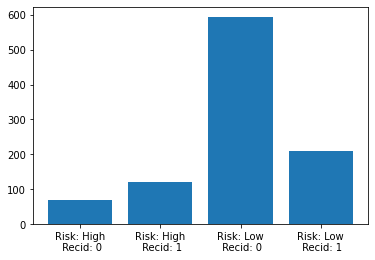

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", delimiter=",")
df = df.dropna(subset=["age"])



df_female = df[df["sex"].str.contains("Female")]

df_female["is_recid"] = df_female["is_recid"].map(str)

cat = []
risk_recid = []
for i in ["High", "Low"]:
    for j in (0,1):
        A1 = df_female[df_female["score_text"].str.contains(i)]
        A2 = A1[A1["is_recid"].str.contains(f"{j}")]
        risk_recid.append(f"Risk: {i}\n Recid: {j}")
        cat.append(len(A2))
 
plt.bar(risk_recid, cat)
plt.show()


In [18]:


categorical_columns = ["sex", "age_cat", "race"]

for i in categorical_columns:
    dfoh = pd.get_dummies(df[i], prefix=i)
    df = df.drop(i, axis = 1)
    df = df.join(dfoh)


X = df[["sex_Male", "sex_Female", "age_cat_Less than 25", "age_cat_25 - 45", "age_cat_Greater than 45", "race_Other", "race_African-American", "race_Caucasian", "race_Hispanic", "juv_fel_count", "juv_misd_count", "priors_count"]]
Y = df["decile_score"]
    